# Heart Disease Study on "Heard Disease UCI" kaggle dataset

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import tensorflow as tf
from sklearn import preprocessing


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### First look at the data: 13 feature columns and 1 target column at the end with presence (1) or no presence (0) of heart disease

In [3]:
# df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
df = pd.read_csv('heart.csv')
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Functions to filter the data and create bins for histograms may come in handy

In [5]:
# Useful functions
def make_bins_simple(min_bin, max_bin, size):
    '''
    Create bins for histogram plots
    '''
    return list(range(min_bin, max_bin + size, size))


def make_bins_max(df_col, size):
    '''
    Create bins for histogram plots
    '''
    min_val = m.floor(min(df_col)/10)*10
    max_val = m.ceil(max(df_col)/10)*10
    
    return list(range(min_val, max_val + size, size))


def age_sex_df(df, min_age, max_age, sex):
    '''
    Custom filter data frame
    '''
    return df.loc[(df.age > min_age) & (df.age < max_age) & (df.sex == sex)]

# 1. Exploratory data analysis: 
## a) Distribution of gender

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


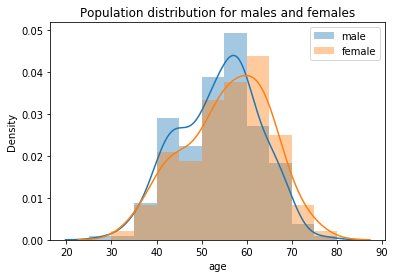

In [20]:
male_df = age_sex_df(df, 0, 100, 1)
female_df = age_sex_df(df, 0, 100, 0)
bins = make_bins_max(df.age, 5)
sns.distplot(male_df.age, bins = bins, label = 'male')
sns.distplot(female_df.age, bins = bins, label = 'female')
plt.legend()
plt.title("Population distribution for males and females")
plt.show()

## b) Histogram with of resting blood presure

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


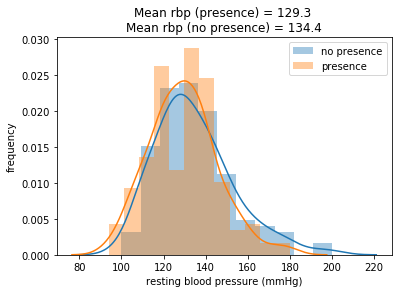

In [11]:
no_presence = (df.loc[(df.trestbps > 0) & (df.target == 0)]).trestbps
presence = (df.loc[(df.trestbps > 0) & (df.target == 1)]).trestbps
mean_np, mean_p = np.around(np.mean(no_presence), 1), np.around(np.mean(presence), 1)
#bins = make_bins_max(df.trestbps, 10)
sns.distplot(no_presence, label = 'no presence')
sns.distplot(presence, label = 'presence')
plt.xlabel('resting blood pressure (mmHg)')
plt.ylabel('frequency')
plt.legend()
plt.title(f"""Mean rbp (presence) = {mean_p} 
Mean rbp (no presence) = {mean_np}""")
plt.show()

## c) Histogram of fasting blood sugar, and chest pain reports
### target 0 = no presence, target 1 = presence of heart disease

/Users/Anton/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


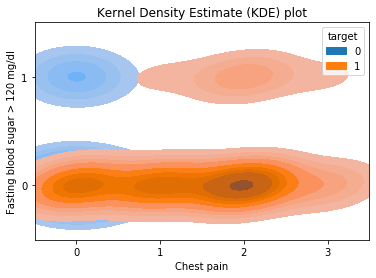

In [12]:
sns.kdeplot(df.cp, df.fbs, fill=True, hue = df.target, alpha = 1, thresh=.1)
plt.xlabel('Chest pain')
plt.ylabel('Fasting blood sugar > 120 mg/dl')
plt.xticks([0,1,2,3])
plt.yticks([0,1])
plt.xlim(-0.5, 3.5)
plt.ylim(-0.5,1.5)
plt.title("Kernel Density Estimate (KDE) plot")
plt.show()

## 2.  Applying a neural network model 
## a) Preprocessing data
#### Check that the data is balanced (same number of target categories 0s and 1s)

In [42]:
sum(df.target)/len(df.target)
# There are more 1s than 0s but not too many.

0.5445544554455446

#### Define target and scaled feature arrays

In [30]:
# Separate features and targets into numpy arrays
# scale features using the sklearn preprocessing package
targets = np.array(df.target)
unscaled_features = np.array(df.loc[:, df.columns != 'target'])
scaled_features = preprocessing.scale(unscaled_features)

#### Shuffle the data (targets are currently ordered, 1s first, 0s second)

In [43]:
shuffled_indices = np.arange(scaled_features.shape[0])
np.random.shuffle(shuffled_indices)
# Shuffle by assigninf random index
shuffled_features = scaled_features[shuffled_indices]
shuffled_targets = targets[shuffled_indices]

#### Split data into train, test and validation sets (80:10:10)

In [53]:
sample_counts = shuffled_features.shape[0]
train_counts = int(0.8 * sample_counts)
validation_counts = int(0.1 * sample_counts)
test_counts = sample_counts - train_counts - validation_counts

train_inputs = shuffled_features[:train_counts]
train_targets = shuffled_targets[:train_counts]

validation_inputs = shuffled_features[train_counts:train_counts+validation_counts]
validation_targets = shuffled_targets[train_counts:train_counts+validation_counts]

test_inputs = shuffled_features[train_counts + validation_counts:]
test_targets = shuffled_targets[train_counts + validation_counts:]

### Save the three datasets in .npz format for TensorFlow

In [60]:
np.savez('heart_train', inputs=train_inputs, targets=train_targets)
np.savez('heart_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('heart_test', inputs=test_inputs, targets=test_targets)